# USER OVERVIEW ANALYSIS

First identification of the following was made.
1. top 10 handsets used by customers
2. top 3 handset manufacturers
3. top 5 handsets per top 3 handset manufacturer

In [1]:
import os, sys


In [2]:
sys.path.insert(0,'../scripts/')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read excel data sheet (source data)
pd.set_option('max_column', None)
df=pd.read_excel('../data/Week1_challenge_data_source.xlsx', na_values=['?', None])
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [6]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


# 1. top ten handsets

In [7]:
handsetType = df['Handset Type'].value_counts()[:10]
handsetType

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [8]:
topHandsetType = df.groupby(['Handset Type']).agg({'Handset Type': ['count']})
topHandsetType.columns = ['count']
topHandsetType = topHandsetType.reset_index()
topHandsetType.head()

,Handset Type,count
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1


In [9]:
topHandsetType = topHandsetType.nlargest(10, 'count')
topHandsetType = topHandsetType.reset_index(drop=True)

print('Top 10 handsets used by customers')

topHandsetType

Top 10 handsets used by customers


,Handset Type,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


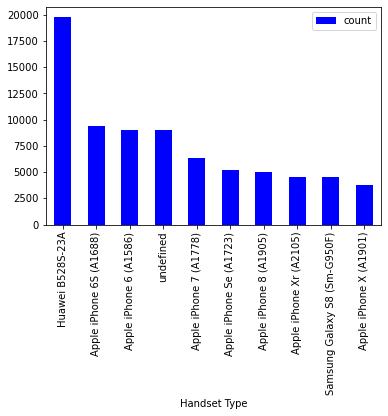

In [10]:
topHandsetType.plot.bar(x='Handset Type' ,stacked=True, color='blue')

# 2.top 3 handset manufacturers

In [11]:
topHandsetComp = df['Handset Manufacturer'].value_counts()[:3]
topHandsetComp

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [12]:
topHandsetManu = df.groupby(['Handset Manufacturer']).agg({'Handset Manufacturer': ['count']})
topHandsetManu.columns = ['count']
topHandsetManu = topHandsetManu.reset_index()
#topHandsetManu.head()
topHandsetManu = topHandsetManu.nlargest(3, 'count')
topHandsetManu = topHandsetManu.reset_index(drop=True)

print('Top 3 handsets Manufacturer')

topHandsetManu

Top 3 handsets Manufacturer


,Handset Manufacturer,count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


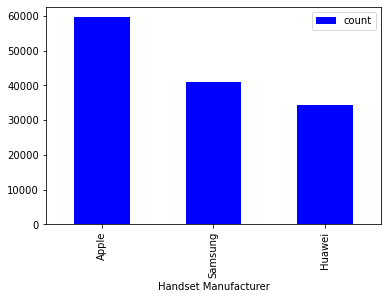

In [13]:
topHandsetManu.plot.bar(x='Handset Manufacturer' , stacked=True, color='blue')

# 3. top 5 handsets per top 3 handset manufacturer

 top 3 handset manufacturers: Apple,Samsung and huawei

In [14]:
appleTop = df.loc[df['Handset Manufacturer'] == 'Apple']
appleTop = appleTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
appleTop.columns = ['count']
appleTop=appleTop.nlargest(5, 'count')
appleTop

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9419
                     Apple iPhone 6 (A1586)    9023
                     Apple iPhone 7 (A1778)    6326
                     Apple iPhone Se (A1723)   5187
                     Apple iPhone 8 (A1905)    4993

In [15]:
samTop = df.loc[df['Handset Manufacturer'] == 'Samsung']
samTop = samTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
samTop.columns = ['count']
samTop=samTop.nlargest(5, 'count')
samTop

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4520
                     Samsung Galaxy A5 Sm-A520F     3724
                     Samsung Galaxy J5 (Sm-J530)    3696
                     Samsung Galaxy J3 (Sm-J330)    3484
                     Samsung Galaxy S7 (Sm-G930X)   3199

In [16]:
huaTop = df.loc[df['Handset Manufacturer'] == 'Huawei']
huaTop = huaTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
huaTop.columns = ['count']
huaTop=huaTop.nlargest(5, 'count')
huaTop

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19752
                     Huawei E5180                     2079
                     Huawei P20 Lite Huawei Nova 3E   2021
                     Huawei P20                       1480
                     Huawei Y6 2018                    997

In [17]:
top5pertop3 = df.loc[:,['Handset Type','Handset Manufacturer']]
value = top5pertop3.groupby(['Handset Manufacturer', 'Handset Type']).size()
topList = pd.Series(dtype='object')
for i in topHandsetComp.index:
    topList = topList.append(value[i])
top5pertop3List = topList.sort_values(ascending=False)[:5]
top5pertop3List

Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
dtype: int64

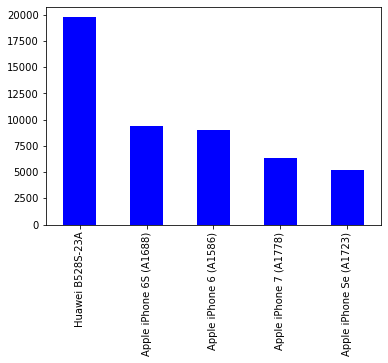

In [18]:
top5pertop3List.plot.bar(y='count', stacked=True, color='blue')

-> so when looking for individual five models from the top 3 manufacturers, Hwawei B528S-23A is the most popular phone, accounting for 19752 units. Users prefer the Huawei B528S-23A, so we know that selling more and similar Huawei phones, running promotions on their similar product will account for success in future busenesses. This also will apply to the four models of Apple that succeed the huawei handset. (Apple 6S, 6, 7, and SE)

# Overview of the users’ behavior on applications(Social media, Google, Email, Youtube, Netflix, Gaming, etc)

# 1. Information about the given data

In [19]:
import os, sys
sys.path.insert(0,'../scripts/')
from data_preProcessing import data_preProcessing_script ###import the preprocessing class written in the preprocessing script

In [20]:
preProcess = data_preProcessing_script(df)
preProcess.show_datatypes()

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

# To summarize the datatypes:
* 'start' and 'end' are 'datetime64' type.
* 'Handset Manufacturer', 'Handset type' and 'location name' are object types.
* And the remaining columns contain entries of 'float64' datatypes.

In [21]:
#getting the summary of our dataframe, the null values
preProcess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [22]:
#show correlation among feilds(each column)
preProcess.show_correlation()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Start ms,1.000000,0.120945,0.001287,-0.000054,-0.001021,-0.001133,0.004141,-0.002221,-0.000690,-0.001268,0.000328,-0.003581,0.000720,-0.003107,-0.000161,0.002657,0.000254,-0.000158,0.000389,0.000124,0.003431,0.001835,-0.000043,-0.000338,0.001287,0.007230,-0.000899,0.000793,-0.001777,-0.001404,-0.003553,0.000196,0.002220,0.001262,0.000385,0.002274,0.000722,0.001144,-0.001176,-0.001582,0.001238,-0.002593,-0.002334,-0.004229,-0.002512,-0.003687,0.003803,-0.000028,-0.004299
End ms,0.120945,1.000000,-0.001302,0.000328,-0.001890,-0.000032,-0.005287,-0.002607,0.000694,0.000687,0.004941,-0.003375,-0.003683,0.004041,0.002347,0.002761,-0.001993,0.002116,0.002523,-0.001948,0.003216,-0.001732,0.000404,-0.000790,-0.001302,0.002237,0.000798,0.002715,-0.008467,0.006226,-0.000638,-0.004367,-0.002287,0.003102,-0.004010,-0.001284,0.004191,-0.002262,-0.000538,-0.003741,-0.003450,0.004132,-0.001156,-0.004687,0.000988,0.002758,0.002786,-0.000574,-0.004687
Dur. (ms),0.001287,-0.001302,1.000000,-0.019798,0.024616,-0.058043,-0.052472,-0.002981,-0.165355,-0.113996,0.018902,0.006496,0.197410,-0.193948,-0.145959,-0.103026,0.107199,-0.082678,-0.030623,-0.017919,0.024795,0.038236,-0.072672,-0.065697,1.000000,0.067432,0.042164,0.073890,0.012882,0.072838,0.014626,-0.059680,-0.065600,-0.002716,-0.001286,0.001228,-0.003466,0.003956,-0.001271,0.003853,0.002211,-0.001834,-0.005517,0.000691,0.001841,-0.000404,0.001101,-0.001019,0.000768
IMSI,-0.000054,0.000328,-0.019798,1.000000,-0.662558,-0.000536,-0.000365,-0.000437,-0.000557,-0.000269,-0.003147,-0.005253,0.000604,-0.000515,-0.000400,-0.000447,0.001765,-0.001342,-0.000616,-0.000482,-0.000709,-0.000346,-0.000551,0.000460,-0.019798,-0.000683,-0.000747,0.000989,-0.003748,-0.006136,-0.002330,0.003790,0.003328,0.002759,-0.004605,-0.003120,-0.003454,-0.001247,-0.003335,0.000967,0.002578,-0.003829,0.001217,0.005149,-0.001209,0.000802,-0.001011,0.000744,0.005030
MSISDN/Number,-0.001021,-0.001890,0.024616,-0.662558,1.000000,0.005703,-0.001701,0.008404,-0.001857,-0.001278,0.020756,0.003438,0.001840,-0.001656,-0.001385,-0.001120,0.000820,-0.000623,-0.000236,-0.000158,0.020304,0.021468,-0.001075,-0.001014,0.024616,0.066178,0.039928,0.068682,0.013035,0.064048,0.013566,-0.001315,-0.000902,-0.001859,0.001290,0.000867,0.002051,0.002759,0.002628,0.003344,0.005482,0.003370,0.000012,-0.003618,0.003510,-0.001369,0.001324,0.005421,-0.003415
IMEI,-0.001133,-0.000032,-0.058043,-0.000536,0.005703,1.000000,-0.003732,0.134446,0.301312,0.240492,0.103018,0.024287,-0.318413,0.186724,0.279593,0.308115,-0.198734,0.150153,0.085759,0.056228,0.114838,0.149758,0.406947,0.365607,-0.058043,0.323269,0.166683,0.339418,0.083424,0.320034,0.103696,0.488390,0.462545,0.000203,-0.005091,-0.002073,0.005599,-0.003987,0.003275,0.001277,-0.000728,-0.001591,-0.004559,0.001828,0.003727,0.004183,0.000655,-0.000463,0.001774
Avg RTT DL (ms),0.004141,-0.005287,-0.052472,-0.000365,-0.001701,-0.003732,1.000000,0.007867,-0.0

# Clean the data, manipulation, and overview of applications(on aggregate per user basis) Task 1.1

In [23]:
# dropping duplicate rows
preProcess.drop_duplicates()

In [24]:
#changing bytes to megabytes
preProcess.convertByteMB(['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)','Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'])

Byte to MB change error


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1.545765e+12,2.442000e+10,1.634479e+12,1.271433e+12,3.563542e+12,1.377620e+11,1.585461e+13,2.501332e+12,8.198936e+12,9.656251e+12,2.780823e+14,1.434415e+13,1.717444e+14,8.814393e+12,3.674974e+13,3.088796e+14
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1.926113e+12,7.165000e+09,3.493924e+12,9.201720e+11,6.290460e+11,3.083390e+11,2.024740e+13,1.911173e+13,1.833841e+13,1.722713e+13,6.087501e+14,1.170709e+12,5.269042e+14,1.505514e+13,5.380039e+13,6.533850e+14
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1.684053e+12,4.222400e+10,8.535055e+12,1.694064e+12,2.690151e+12,6.729730e+11,1.972566e+13,1.469958e+13,1.758779e+13,6.163408e+12,2.295846e+14,3.956300e+11,4.106926e+14,4.215763e+12,2.788364e+13,2.798073e+14
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,6.441210e+11,1.337200e+10,9.023734e+12,2.788027e+12,1.439754e+12,6.312290e+11,2.138812e+13,1.514664e+13,1.399465e+13,1.097942e+12,7.995382e+14,1.084972e+13,7.490399e+14,1.279728e+13,4.332422e+13,8.460285e+14
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,8.626000e+11,5.018800e+10,6.248284e+12,1.500559e+12,1.936496e+12,1.738530e+11,1.525938e+13,1.896287e+13,1.712458e+13,4.152180e+11,5.277072e+14,3.529801e+12,5.507095e+14,1.391032e+13,3.854281e+13,5.691386e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:

In [25]:
preProcess.columns_WithMissingValue()

['Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Total UL (MegaBytes

In [26]:
preProcess.c_missing_percentage()

,total_missing_values,missing_percentage
Bearer Id,0,0.0 %
Start,1,0.0 %
Start ms,1,0.0 %
End,1,0.0 %
End ms,1,0.0 %
Dur. (ms),1,0.0 %
IMSI,570,0.38 %
MSISDN/Number,1066,0.71 %
IMEI,572,0.38 %
Last Location Name,1153,0.77 %


# Drop columns having more than 30% null values
* filling missing values
* use fill forward method
* use mean for quantitative data


In [27]:
data = df.ffill().bfill()
dataVal = data_preProcessing_script(data)
dataVal.c_missing_percentage()

,total_missing_values,missing_percentage
Bearer Id,0,0.0 %
Start,0,0.0 %
Start ms,0,0.0 %
End,0,0.0 %
End ms,0,0.0 %
Dur. (ms),0,0.0 %
IMSI,0,0.0 %
MSISDN/Number,0,0.0 %
IMEI,0,0.0 %
Last Location Name,0,0.0 %


# Now arrange the prime dataframe according to xDR session

In [29]:
#getting the number od xDR sessions
df_new = (data.groupby(['MSISDN/Number'])['Bearer Id'].agg([('no.of xDR sessions','count')]).reset_index())
df_new.head()

,MSISDN/Number,no.of xDR sessions
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


# Session duration

In [30]:
# Time aggregates
df_new['Start ms']=data['Start ms']
df_new['End ms']=data['End ms']
df_new['Start']=data['Start']
df_new['End']=data['End']
df_new['Avg Delay (ms)']=data['Avg RTT UL (ms)']+data['Avg RTT DL (ms)']
df_new['Dur. (ms)']=data['Dur. (ms)']
df_new['Dur. (ms).1']=data['Dur. (ms).1']
df_new["Activity_Duration(ms)"]=data['Activity Duration UL (ms)']+data['Activity Duration DL (ms)']

# Total DL and UL data

In [31]:
# Aggregation of Total values
df_new["Total Uploads"]=data["Google UL (MegaBytes)"]+data["Email UL (MegaBytes)"]+data["Social Media UL (MegaBytes)"]+data["Youtube UL (MegaBytes)"]+data["Netflix UL (MegaBytes)"]+data["Gaming UL (MegaBytes)"]+data["Other UL (MegaBytes)"]
df_new["Total Downloads"]=data["Google DL (MegaBytes)"]+data["Email DL (MegaBytes)"]+data["Social Media DL (MegaBytes)"]+data["Youtube DL (MegaBytes)"]+data["Netflix DL (MegaBytes)"]+data["Gaming DL (MegaBytes)"]+data["Other DL (MegaBytes)"]
df_new['Total UL and DL']=df_new['Total Downloads']+df_new["Total Uploads"]

# Total data vol. in bytes during this session for each app

In [32]:
# Aggregation of Total Social Media data
df_new["Youtube_Total_Data"]=data["Youtube DL (MegaBytes)"]+data["Youtube UL (MegaBytes)"]
df_new["Google_Total_Data"]=data["Google DL (MegaBytes)"]+data["Google UL (MegaBytes)"]
df_new["Email_Total_Data"]=data["Email DL (MegaBytes)"]+data["Email UL (MegaBytes)"]
df_new["Social_Media_Total_Data"]=data["Social Media DL (MegaBytes)"]+data["Social Media UL (MegaBytes)"]
df_new["Netflix_Total_Data"]=data["Netflix DL (MegaBytes)"]+data["Netflix UL (MegaBytes)"]
df_new["Gaming_Total_Data"]=data["Gaming DL (MegaBytes)"]+data["Gaming UL (MegaBytes)"]
df_new["Other_Total_Data"]=data["Other DL (MegaBytes)"]+data["Other UL (MegaBytes)"]

In [33]:
# total speed kbps and categorical var.
df_new['Avg Throughput (kbps)']=data['Avg Bearer TP UL (kbps)']+data['Avg Bearer TP DL (kbps)']

df_new['Handset Manufacturer']=data['Handset Manufacturer']
df_new['Handset Type']=data['Handset Type']
df_new['Last Location Name']=data['Last Location Name']
df_new['IMSI']=data['IMSI']
df_new['IMEI']=data['IMEI']

In [37]:
#take a look into df_new
df_new.head()

,MSISDN/Number,no.of xDR sessions,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,770.0,662.0,2019-04-04 12:01:18,2019-04-25 14:35:31,47.0,1823652.0,1.823653e+09,76411.0,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,2.924265e+14,1.805588e+14,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,235.0,606.0,2019-04-09 13:04:04,2019-04-25 08:15:48,70.0,1365104.0,1.365104e+09,3728.0,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,6.099208e+14,5.419594e+14,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,1.0,652.0,2019-04-09 17:42:11,2019-04-25 11:58:13,70.0,1361762.0,1.361763e+09,0.0,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,2.299803e+14,4.149084e+14,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,486.0,171.0,2019-04-10 00:31:25,2019-04-25 07:36:35,70.0,1321509.0,1.321510e+09,41212.0,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,8.103879e+14,7.618372e+14,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,565.0,954.0,2019-04-12 20:10:23,2019-04-25 10:40:32,70.0,1089009.0,1.089009e+09,0.0,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,5.312370e+14,5.646198e+14,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   MSISDN/Number            106856 non-null  float64       
 1   no.of xDR sessions       106856 non-null  int64         
 2   Start ms                 106856 non-null  float64       
 3   End ms                   106856 non-null  float64       
 4   Start                    106856 non-null  datetime64[ns]
 5   End                      106856 non-null  datetime64[ns]
 6   Avg Delay (ms)           106856 non-null  float64       
 7   Dur. (ms)                106856 non-null  float64       
 8   Dur. (ms).1              106856 non-null  float64       
 9   Activity_Duration(ms)    106856 non-null  float64       
 10  Total Uploads            106856 non-null  float64       
 11  Total Downloads          106856 non-null  float64       
 12  Total UL and DL 

* Now we are left with 26 feilds which are fully filled. so save the new df as cleaned data sheet.

In [39]:
print("""

# saving clean data...

""")
df_new.to_csv('../data/cleaned_telecom_data.csv', index=False)
print('clean data successfully saved!!')



# saving clean data...


clean data successfully saved!!
